In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics


In [51]:
vehicle=pd.read_csv("vehicle.csv")

In [4]:
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


Point 1. Data Pre-processing

In [5]:
vehicle.shape

(846, 19)

In [6]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [7]:
# Detecting the null values 
vehicle.isnull().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [8]:
#Replacing null values in each column with the mean
for col in vehicle.columns:
    if vehicle[col].isnull().any():
        vehicle[col].fillna(value=vehicle[col].mean(),inplace=True)

In [9]:
vehicle.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [10]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

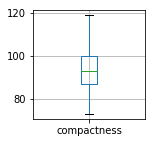

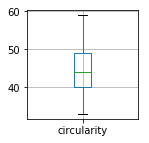

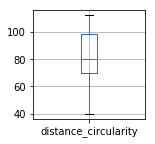

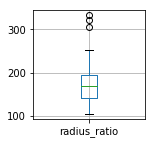

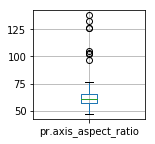

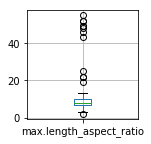

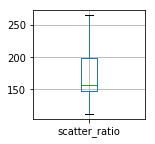

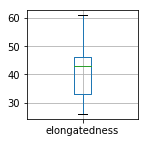

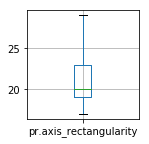

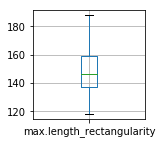

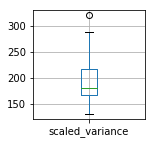

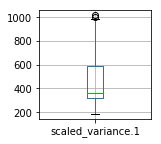

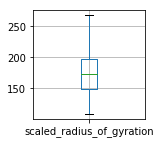

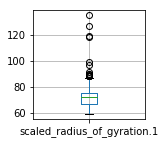

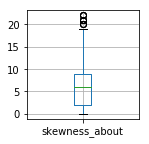

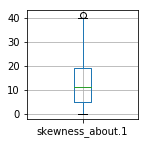

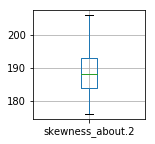

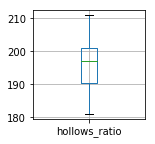

In [11]:
#Checking for the outliers
for col in vehicle.columns:
    if col=="class":
        continue
    else:
        plt.figure(figsize=(2,2))
        vehicle.boxplot([col])

    

In [12]:
#Removing the outliers from the data
for col in vehicle.columns:
    if col=="class":
        continue
    else:
        q1, q3 = np.percentile(vehicle[col], [25, 75])
        iqr = q3 - q1   
        lower_bound = q1 - (iqr * 1.5)    
        upper_bound = q3 + (iqr * 1.5)  
        criteria1=vehicle[col] < lower_bound 
        criteria2=vehicle[col] > upper_bound
        print("Before deleting the outliers from \'",col,"\'","length of df is:",len(vehicle))
        print("Number of outliers in \'",col,"\'","are:",len(vehicle[criteria1|criteria2]))
        vehicle.drop(vehicle[criteria1|criteria2].index,axis=0,inplace=True)
        print("After deleting the outliers from \'",col,"\'","length of df is:",len(vehicle))
        print("\n")

Before deleting the outliers from ' compactness ' length of df is: 846
Number of outliers in ' compactness ' are: 0
After deleting the outliers from ' compactness ' length of df is: 846


Before deleting the outliers from ' circularity ' length of df is: 846
Number of outliers in ' circularity ' are: 0
After deleting the outliers from ' circularity ' length of df is: 846


Before deleting the outliers from ' distance_circularity ' length of df is: 846
Number of outliers in ' distance_circularity ' are: 0
After deleting the outliers from ' distance_circularity ' length of df is: 846


Before deleting the outliers from ' radius_ratio ' length of df is: 846
Number of outliers in ' radius_ratio ' are: 3
After deleting the outliers from ' radius_ratio ' length of df is: 843


Before deleting the outliers from ' pr.axis_aspect_ratio ' length of df is: 843
Number of outliers in ' pr.axis_aspect_ratio ' are: 5
After deleting the outliers from ' pr.axis_aspect_ratio ' length of df is: 838


Bef

Point 2: Understanding relation between different attributes

In [13]:
vehicle.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.681614,0.787505,0.745090,0.195470,0.493490,0.811456,-0.789458,0.812792,0.675377,0.793340,0.815329,0.580180,-0.248723,0.201165,0.161202,0.291092,0.357820
circularity,0.681614,1.000000,0.788187,0.640140,0.199833,0.559009,0.844988,-0.817121,0.842754,0.961844,0.804543,0.836053,0.926683,0.072001,0.141817,-0.014619,-0.121118,0.032961
distance_circularity,0.787505,0.788187,1.000000,0.807874,0.241174,0.665306,0.904463,-0.909067,0.894441,0.769533,0.884165,0.888738,0.703664,-0.233628,0.099692,0.263214,0.125558,0.316316
radius_ratio,0.745090,0.640140,0.807874,1.000000,0.664153,0.459903,0.786748,-0.843282,0.761094,0.576867,0.790574,0.774630,0.549682,-0.402021,0.040622,0.187298,0.417166,0.502631
pr.axis_aspect_ratio,0.195470,0.199833,0.241174,0.664153,1.000000,0.140174,0.192412,-0.296714,0.161886,0.142125,0.207481,0.178400,0.147156,-0.327985,-0.052880,-0.028831,0.407905,0.422188
max.length_aspect_ratio,0.493490,0.559009,0.665306,0.459903,0.140174,1.000000,0.490762,-0.498298,0.491069,0.644389,0.405497,0.451995,0.399105,-0.334467,0.082885,0.141030,0.057790,0.395718
scatter_ratio,0.811456,0.844988,0.904463,0.786748,0.192412,0.490762,1.000000,-0.971134,0.989138,0.806634,0.977360,0.993778,0.796040,0.007995,0.065092,0.214030,-0.008062,0.108577
elongatedness,-0.789458,-0.817121,-0.909067,-0.843282,-0.296714,-0.498298,-0.971134,1.000000,-0.949817,-0.770496,-0.964857,-0.956503,-0.763359,0.082624,-0.046122,-0.184306,-0.101402,-0.205553
pr.axis_rectangularity,0.812792,0.842754,0.894441,0.761094,0.161886,0.491069,0.989138,-0.949817,1.000000,0.811111,0.964545,0.989207,0.794420,0.023777,0.073648,0.215696,-0.031316,0.090511
max.length_rectangularity,0.675377,0.961844,0.769533,0.576867,0.142125,0.644389,0.806634,-0.770496,0.811111,1.000000,0.750486,0.795567,0.867087,0.055359,0.135461,-0.002048,-0.120231,0.063293


In [14]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 845
Data columns (total 19 columns):
compactness                    814 non-null int64
circularity                    814 non-null float64
distance_circularity           814 non-null float64
radius_ratio                   814 non-null float64
pr.axis_aspect_ratio           814 non-null float64
max.length_aspect_ratio        814 non-null int64
scatter_ratio                  814 non-null float64
elongatedness                  814 non-null float64
pr.axis_rectangularity         814 non-null float64
max.length_rectangularity      814 non-null int64
scaled_variance                814 non-null float64
scaled_variance.1              814 non-null float64
scaled_radius_of_gyration      814 non-null float64
scaled_radius_of_gyration.1    814 non-null float64
skewness_about                 814 non-null float64
skewness_about.1               814 non-null float64
skewness_about.2               814 non-null float64
hollows_ratio    

In [15]:
#Printing all the columns having correlation greater than 0.7 and -0.7
for col in vehicle.columns:
    if col=="class":
        continue
    else:
        print("Correlation of",col,"is:\n")
        for column in vehicle.columns:
            if column=="class":
                continue
            else:
                if ((vehicle[col].corr(vehicle[column])>=0.7)|
                   (vehicle[col].corr(vehicle[column])<=-0.7)):
                    print(column,":",vehicle[col].corr(vehicle[column]))
        print("\n")
    

Correlation of compactness is:

compactness : 0.9999999999999998
distance_circularity : 0.787505273698667
radius_ratio : 0.7450903457247913
scatter_ratio : 0.8114561691432963
elongatedness : -0.7894582914470618
pr.axis_rectangularity : 0.8127924376974105
scaled_variance : 0.7933395204360376
scaled_variance.1 : 0.8153289840503238


Correlation of circularity is:

circularity : 1.0
distance_circularity : 0.7881867490425392
scatter_ratio : 0.8449878531222645
elongatedness : -0.8171209125727157
pr.axis_rectangularity : 0.8427541263624081
max.length_rectangularity : 0.9618443102777723
scaled_variance : 0.8045433639681933
scaled_variance.1 : 0.83605260308459
scaled_radius_of_gyration : 0.9266829679585293


Correlation of distance_circularity is:

compactness : 0.787505273698667
circularity : 0.7881867490425392
distance_circularity : 1.0
radius_ratio : 0.8078736002657851
scatter_ratio : 0.9044628385234174
elongatedness : -0.9090666449765737
pr.axis_rectangularity : 0.8944414205516096
max.leng

###### Observation:
    In the above step, all the columns which are highly correlated with each other are shown
    Correlation among all the above columns is greater than 0.7
    So all of the following columns should be taken into consideration for PCA:
        compactness
        circularity
        distance_circularity
        radius_ratio
        scatter_ratio
        elongatedness
        pr.axis_rectangularity
        max.length_rectangularity
        scaled_variance
        scaled_variance.1
        scaled_radius_of_gyration
        
        But because, even if minimum of two columns are highly collinear, 
        PCA is done for all cols,
        So PCA will be done for all the data
        

Step 3: Doing PCA

In [19]:
vehicle.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [ ]:
features=vehicle.drop(["class"],axis=1)

In [22]:
pca=PCA()
features_pca=pca.fit_transform(features)

In [26]:
features_pca

array([[-5.70502930e+01, -2.16581267e+00,  2.98145264e+01, ...,
         5.16001123e-01,  3.17906212e-01,  1.76830126e-02],
       [-1.16682021e+02,  6.13832501e+00, -5.07274091e+00, ...,
         4.66378025e-02,  5.20507605e-01,  1.18051606e-01],
       [ 2.11794670e+02, -5.45621393e-01,  2.08200235e+01, ...,
         6.40596313e-01, -1.74538733e-01,  5.09199067e-01],
       ...,
       [ 2.96204916e+02, -1.78591090e+01,  3.35138323e-01, ...,
        -5.60882845e-01,  5.74636854e-01, -1.85254006e-01],
       [-1.81075431e+02, -7.76614185e+00, -4.46380081e+00, ...,
         1.26275473e+00, -8.54768872e-01,  8.70135155e-02],
       [-2.47421820e+02,  4.13948651e+00, -1.83299415e+01, ...,
        -7.26405078e-02,  5.69124035e-01,  2.04478937e-01]])

In [24]:
features_pca_df=pd.DataFrame(features_pca,columns=['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'])

In [25]:
features_pca_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-57.050293,-2.165813,29.814526,-6.126536,5.116226,9.044604,5.868847,-1.637840,3.483658,1.755600,0.184495,3.119758,-3.297437,2.367057,-0.276324,0.516001,0.317906,0.017683
1,-116.682021,6.138325,-5.072741,-11.835660,2.718740,-6.889205,1.551204,3.748164,0.009608,-0.075649,-1.922737,3.359787,0.448133,-1.829753,0.236535,0.046638,0.520508,0.118052
2,211.794670,-0.545621,20.820023,3.927703,1.298619,-4.657981,-1.245386,11.357021,2.784306,1.852298,0.167408,1.959878,0.083715,-1.092071,0.826817,0.640596,-0.174539,0.509199
3,-141.060349,-29.799564,-8.970482,-15.790283,-10.559974,-0.834228,4.293734,0.129676,-1.158411,-0.919425,-2.887277,3.067079,1.040536,1.471123,0.264925,-0.752964,-0.202527,-0.361511
4,535.535959,63.317846,-41.311665,13.208767,-3.822512,-13.212375,-14.250215,-1.811962,-6.075961,2.036288,-4.177498,2.879437,-2.603541,-2.281821,5.313917,8.735922,2.350111,-0.123028
5,-79.997929,-10.340960,20.099481,1.521208,-11.646252,-4.864247,-10.760539,-0.578230,3.882760,-2.067074,0.554046,2.042260,0.508711,0.436979,-0.599392,0.467966,0.737331,0.224089
6,-164.714255,-1.535303,20.890082,-0.790914,-8.356745,0.821435,-2.653844,-7.543190,-1.610781,0.857369,-1.326681,-0.330356,-2.995790,-1.272931,0.112533,0.072034,-0.482880,0.194294
7,-237.147386,-27.180324,-20.224367,-7.998184,-9.222504,5.096049,-8.405318,-3.607544,-7.446098,0.032997,-3.029391,1.942531,0.003348,-0.999445,2.088120,-0.190582,-0.470513,0.134355
8,64.448232,-20.122844,-25.726300,-10.480126,-3.194559,-10.802759,5.893673,0.330865,-6.369584,-5.051859,-2.006171,4.827990,-2.718426,2.041291,-0.613208,-0.734880,-1.544904,-0.569871
9,-189.190327,-17.237845,-15.581767,-4.240464,-6.808569,-0.182734,-1.547715,0.288543,-7.428425,0.426726,-1.782688,1.644248,-1.582742,-0.413698,0.761124,0.488867,-1.341273,-0.103086


In [32]:
#Plotting the elbow point 
variance_explained = pca.explained_variance_ratio_ #calculate variance ratios
variance_explained

array([9.64836951e-01, 1.60863243e-02, 1.03617109e-02, 2.41180226e-03,
       1.94088007e-03, 1.14479109e-03, 1.05571471e-03, 6.28345585e-04,
       5.73092826e-04, 3.23629251e-04, 2.59880535e-04, 1.51771264e-04,
       7.67205684e-05, 6.18210442e-05, 3.57438329e-05, 3.10228383e-05,
       1.68719657e-05, 2.92572483e-06])

In [37]:
variance_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
variance_cumulative

array([96.5, 98.1, 99.1, 99.3, 99.5, 99.6, 99.7, 99.8, 99.9, 99.9, 99.9,
       99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9])

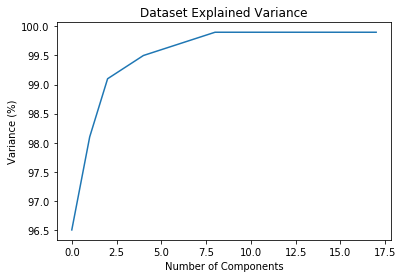

In [38]:
plt.figure()
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

Observation:
    From elbow plot as well, we can see that almost 100% variance is explained by first 9 PCs

Point 4: Use SVM and grid search to tune hyperparameters

In [40]:
features=vehicle.drop(["class"],axis=1)
target=vehicle["class"]

In [41]:
features

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.000000,83.0,178.000000,72.00000,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.000000,84.0,141.000000,57.00000,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.000000,106.0,209.000000,66.00000,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.000000,82.0,159.000000,63.00000,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
5,107,44.828775,106.0,172.000000,50.00000,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183
6,97,43.000000,73.0,173.000000,65.00000,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204
7,90,43.000000,66.0,157.000000,65.00000,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202
8,86,34.000000,62.0,140.000000,61.00000,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208
9,93,44.000000,98.0,168.888095,62.00000,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204
10,86,36.000000,70.0,143.000000,61.00000,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202


In [42]:
target

0      van
1      van
2      car
3      van
5      bus
6      bus
7      van
8      van
9      car
10     van
11     car
12     bus
13     van
14     bus
15     car
16     van
17     bus
18     car
19     car
20     bus
21     van
22     bus
23     bus
24     car
25     van
26     car
27     car
28     bus
29     car
30     van
      ... 
814    bus
816    van
817    car
818    car
819    car
820    car
821    car
822    van
823    car
824    car
825    car
826    car
827    car
828    van
829    van
830    bus
831    bus
832    car
833    car
834    car
836    van
837    car
838    van
839    van
840    car
841    car
842    van
843    car
844    car
845    van
Name: class, Length: 814, dtype: object

In [43]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.30)

In [46]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [60]:
y_pred = svclassifier.predict(X_test)  

In [61]:
print("\nAccuracy:",metrics.accuracy_score(y_test,y_pred))



Accuracy: 0.9346938775510204


In [49]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[ 57   2   1]
 [  2 115   7]
 [  2   2  57]]
              precision    recall  f1-score   support

         bus       0.93      0.95      0.94        60
         car       0.97      0.93      0.95       124
         van       0.88      0.93      0.90        61

   micro avg       0.93      0.93      0.93       245
   macro avg       0.93      0.94      0.93       245
weighted avg       0.94      0.93      0.94       245



In [52]:
params = {'C': [0.01,0.05,0.5,1], 
          'kernel': ['linear','rbf']}

In [55]:
model=svm.SVC()


In [59]:
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

#Learning
model1.fit(X_train,y_train)

#The best hyper parameters set
print("\nBest Hyper Parameters:\n",model1.best_params_)

#Prediction
prediction=model1.predict(X_test)

#evaluation(Accuracy)
print("\nAccuracy:",metrics.accuracy_score(y_test,prediction))

#evaluation(Confusion Metrix)
print("\nConfusion Matrix:\n",metrics.confusion_matrix(y_test,prediction))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



Best Hyper Parameters:
 {'C': 0.05, 'kernel': 'linear'}

Accuracy: 0.9551020408163265

Confusion Matrix:
 [[ 58   1   1]
 [  3 117   4]
 [  0   2  59]]


In [ ]:
#Cross Validating the score

In [62]:
svclassifier = SVC(kernel='linear',C=0.05)  
svclassifier.fit(X_train, y_train)  

SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [63]:
y_pred = svclassifier.predict(X_test)  

In [64]:
print("\nAccuracy:",metrics.accuracy_score(y_test,y_pred))



Accuracy: 0.9551020408163265


In [65]:
print("\nConfusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))


Confusion Matrix:
 [[ 58   1   1]
 [  3 117   4]
 [  0   2  59]]
